In [1]:
import numpy as np
import pandas as ps
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load dataset
fmnist = tf.keras.datasets.fashion_mnist

# Split data
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizing pixel values (to a range between 0-1)
train_images = train_images/255.0
test_images = test_images/255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Check train images shape
train_images.shape

(60000, 28, 28)

Label: 7
Image Array: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

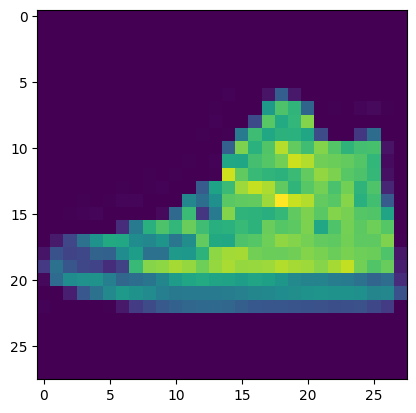

In [14]:
# Visualize image you want to see

index = 142
np.set_printoptions(linewidth = 320)
print(f"Label: {train_labels[index]}")
print(f"Image Array: {train_images[index]}")
plt.imshow(train_images[index])


In [9]:
# Define model

model = tf.keras.models.Sequential([
        # Convolutions and pooling
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten output
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
    ])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# EARLYSTOPPING
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    # Define the correct function signature for on_epoch_end method
    def on_epoch_end(self, epoch, logs=None):

        # Check if the accuracy is greater or equal to 0.98
        if logs is not None and logs.get('accuracy') >= 0.98:

            # Stop training once the above condition is met
            self.model.stop_training = True

            print("\nReached 98% accuracy so cancelling training!")

In [12]:
# Compile model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# Instantiate callback
early_stopping = EarlyStoppingCallback()

# Train model
model.fit(train_images, train_labels,
          epochs = 10,
          batch_size = 32,
          validation_data = (test_images, test_labels),
          callbacks = [early_stopping]
          )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.8136 - loss: 0.5276 - val_accuracy: 0.8831 - val_loss: 0.3192
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9022 - loss: 0.2704 - val_accuracy: 0.9021 - val_loss: 0.2649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9177 - loss: 0.2217 - val_accuracy: 0.9097 - val_loss: 0.2495
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9319 - loss: 0.1844 - val_accuracy: 0.9073 - val_loss: 0.2575
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9423 - loss: 0.1561 - val_accuracy: 0.9127 - val_loss: 0.2541
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9540 - loss: 0.1288 - val_accuracy: 0.9188 - val_loss: 0.2570
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9593 - loss: 0.1084 - val_accuracy: 0.9050 - val_loss: 0.2901
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9657 -

In [13]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9149 - loss: 0.3382


[0.32115504145622253, 0.9164000153541565]